# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...2")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...2


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
  cov_matrix = np.dot(X_train.T, X_train)

  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

  sorted_idx = np.argsort(eigenvalues)[::-1]
  top_eigenvectors = eigenvectors[:, sorted_idx[:n_components]]

  x_train_compressed = np.dot(X_train, top_eigenvectors)
  x_test_compressed = np.dot(X_test, top_eigenvectors)

  return x_train_compressed, x_test_compressed

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
svd_components = [10,15,30,40,60,90,120,150,180,240,360,784]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
svd done in  2.4124298095703125


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1800 seconds
Applying custom SVD with 15 components...
svd done in  1.6106398105621338


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.8449, Training time: 2.1584 seconds
Applying custom SVD with 30 components...
svd done in  2.4928150177001953


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8924, Training time: 5.0213 seconds
Applying custom SVD with 40 components...
svd done in  3.18471097946167


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.9024, Training time: 7.4874 seconds
Applying custom SVD with 60 components...
svd done in  1.8311364650726318


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.9133, Training time: 18.3813 seconds
Applying custom SVD with 90 components...
svd done in  3.9243571758270264


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 90, Accuracy: 0.9186, Training time: 53.6090 seconds
Applying custom SVD with 120 components...
svd done in  1.975606918334961


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 120, Accuracy: 0.9184, Training time: 80.7392 seconds
Applying custom SVD with 150 components...
svd done in  2.206888437271118


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 102.9169 seconds
Applying custom SVD with 180 components...
svd done in  2.5712194442749023


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 180, Accuracy: 0.9215, Training time: 156.8264 seconds
Applying custom SVD with 240 components...
svd done in  3.4174013137817383


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 240, Accuracy: 0.9206, Training time: 176.0102 seconds
Applying custom SVD with 360 components...
svd done in  2.7635953426361084


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 360, Accuracy: 0.9195, Training time: 355.5390 seconds
Applying custom SVD with 784 components...
svd done in  4.261388540267944


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 871.1721 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


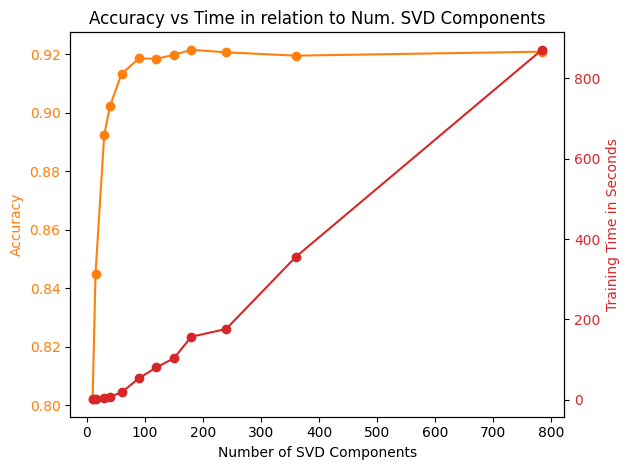

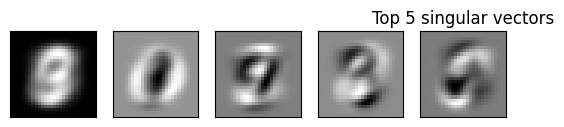

In [32]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
lrank, lacc, ltime = zip(*results)

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Number of SVD Components')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(lrank, lacc, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Training Time in Seconds', color=color)
ax2.plot(lrank, ltime, color=color,marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Accuracy vs Time in relation to Num. SVD Components')
fig.tight_layout()
plt.show()

#adding code to find top 5 singular values
eigenvalues, eigenvectors = np.linalg.eigh(np.dot(X_train.T, X_train))
sorted_vec = np.argsort(eigenvalues)[::-1]
top_eigenvectors = eigenvectors[:, sorted_vec[:5]]

ifig, ax = plt.subplots(1,5)
for i, axi in enumerate(ax.flat):
  axi.imshow((top_eigenvectors[:, i]).reshape(28,28), cmap='gray')
  axi.set(xticks=[], yticks=[])
plt.title('Top 5 singular vectors')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [33]:
"""
SVD makes a massive difference to the perfornamce and time efficiency of training models.

In this case, we were able to get a comparable (if not better) accuracy using only a 7th of the components,
which means a practical training time reduction of about 16x. (if you're conservative, using only 1/4th, at a 5x time reduction)

This shows how strong the law of diminishing returns can be when it comes to training, but also as the accuracy starts
to lower again after around 200 components, this can also show how there is harm in too much data. This could reflect a form of overfitting!

It also seems the processing times increase (very roughly) linearly with the number of components.
I believe the sweetspot in the number of components is probably in the range in between 180-220 if you care most about having the
highest accuracy possible (without overfitting). If you're priority is instead getting a good-enough result with a time constraint,
the sweetspot is somewhere around 90-120ish.

Either way, SVD is definitely a must for this kind of thing.
"""

"\nSVD makes a massive difference to the perfornamce and time efficiency of training models. \n\nIn this case, we were able to get a comparable (if not better) accuracy using only a 7th of the components, \nwhich means a practical training time reduction of about 16x. (if you're conservative, using only 1/4th, at a 5x time reduction)\n\nThis shows how strong the law of diminishing returns can be when it comes to training, but also as the accuracy starts\nto lower again after around 200 components, this can also show how there is harm in too much data. This could reflect a form of overfitting!\n\nIt also seems the processing times increase (very roughly) linearly with the number of components. \nI believe the sweetspot in the number of components is probably in the range in between 180-220 if you care most about having the\nhighest accuracy possible (without overfitting). If you're priority is instead getting a good-enough result with a time constraint,\nthe sweetspot is somewhere aroun